# Boosting in Cox Regression

## Load libraries

In [22]:
# require(devtools)
# install_version("CoxBoost", version = "1.3", repos = "http://cran.us.r-project.org")
# remotes::install_github("mlr-org/mlr3extralearners")

In [1]:
## load the required packages

# clear all workspace
rm(list=ls()) 
# install the necessary packages
library("mlr3")
library("mlr3proba")
library("mlr3learners")
library("mlr3extralearners")
library("data.table")
library("mlr3viz")
library("mlr3tuning")
library("mlr3pipelines")
library("purrr")
library("mboost")
library("CoxBoost")
library("survival")
library("paradox")
library("ggrepel")
library("precrec")
library("ggplot2")
library("ggpubr")
library("tidyverse")
library("mlr3filters")
library("ranger")


Attaching package: ‘mlr3extralearners’


The following object is masked from ‘package:mlr3learners’:

    LearnerClassifNnet


The following objects are masked from ‘package:mlr3’:

    lrn, lrns


Loading required package: paradox


Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


Loading required package: parallel

Loading required package: stabs

Loading required package: survival

Loading required package: Matrix

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:mboost’:

    %+%


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()     masks mboost::%+%()
✖ dplyr::between()   masks data.table::between()
✖ tidyr::expand()    masks M

## Create the task for `d2`

In [2]:
# read in the raw data
train_data_original <- readRDS("~/Prediction_Challenge_T2E_ML/Data-20210107/train_data.Rds")

In [3]:
# get the corresponding dataframe1
train_data_d2 <- train_data_original$d2

In [4]:
## create the corresponding task as for dataframe 1
tsks_train_d2 <- TaskSurv$new("df2", backend = train_data_original$d2, time = "time", event = "status")
## check the task
tsks_train_d2

<TaskSurv:df2> (552 x 1692)
* Target: time, status
* Properties: -
* Features (1690):
  - dbl (1690): V1, V10, V100, V1000, V1001, V1002, V1003, V1004,
    V1005, V1006, V1007, V1008, V1009, V101, V1010, V1011, V1012,
    V1013, V1014, V1015, V1016, V1017, V1018, V1019, V102, V1020,
    V1021, V1022, V1023, V1024, V1025, V1026, V1027, V1028, V1029,
    V103, V1030, V1031, V1032, V1033, V1034, V1035, V1036, V1037,
    V1038, V1039, V104, V1040, V1041, V1042, V1043, V1044, V1045,
    V1046, V1047, V1048, V1049, V105, V1050, V1051, V1052, V1053,
    V1054, V1055, V1056, V1057, V1058, V1059, V106, V1060, V1061,
    V1062, V1063, V1064, V1065, V1066, V1067, V1068, V1069, V107,
    V1070, V1071, V1072, V1073, V1074, V1075, V1076, V1077, V1078,
    V1079, V108, V1080, V1081, V1082, V1083, V1084, V1085, V1086,
    V1087, V1088, [...]

### Feature filtering
There are unobserved levels appearing when it comes to cross validation. Thus either `droplevels()` or do feature filtering.

In [5]:
###### feature filtering ######
library("mlr3filters") # load the required library
library("ranger")

lrn = lrn("surv.ranger")
lrn$param_set$values = list(importance = "impurity")

# set up the filter
filter = flt("importance", learner = lrn)
filter$calculate(tsks_train_d2) # calculate the corresponding importance scores
c_tab <- as.data.table(filter)
c_tab

Growing trees.. Progress: 50%. Estimated remaining time: 30 seconds.
Growing trees.. Progress: 100%. Estimated remaining time: 0 seconds.


feature,score
<chr>,<dbl>
V112,1.4446055
V31,1.1627034
V661,0.9352320
V779,0.8660635
V1559,0.8293549
V1461,0.8274059
V578,0.7351067
V1609,0.7240470
V1583,0.7126006


In [6]:
# select the importance scores with >10
c_var = c_tab$feature[c_tab$score >= 0.6]
c_var = as.vector(c_var)
append(c_var, c("time", "status"))

[1] "V112"   "V31"    "V661"   "V779"   "V1559"  "V1461"  "V578"   "V1609" 
 [9] "V1583"  "V736"   "V423"   "V1396"  "V1448"  "V1284"  "V648"   "V581"  
[17] "V37"    "V113"   "time"   "status"

In [5]:
## subset the train data
train_flt_d2 <- subset(train_data_d2, select=c('V31','V112','V661','V779','V1559',
                                               'V1461','V578','V1609','V1583','V736',
                                               'V423','V1396','V1448','V1284','V648',
                                               'V581','V37','V113', 'time','status'))
train_flt_d2

,V31,V112,V661,V779,V1559,V1461,V578,V1609,V1583,V736,V423,V1396,V1448,V1284,V648,V581,V37,V113,time,status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM411292,-0.0465,0.3607,-1.6364,-1.2336,-0.5551,-1.0574,-0.4728,0.3299,-0.9882,-0.7877,-1.3068,1.3713,-1.0252,0.5898,0.1959,0.4512,0.6591,0.5727,2.7980835,0
GSM411293,1.0377,1.6579,0.9922,1.4930,0.8726,0.7176,1.9566,0.5111,0.8297,-0.2230,-0.2383,0.8794,0.4547,0.1431,1.1606,-0.1438,0.5175,1.4649,1.8480493,0
GSM411295,0.4763,0.6970,-0.5833,0.6925,-0.9078,-0.2560,1.0812,-0.0467,0.0799,-1.0088,-0.5222,1.3472,2.0435,1.0761,0.2611,0.3999,1.1270,0.9292,5.0814511,0
GSM411298,1.3039,1.3936,0.1465,1.7208,1.7722,2.4560,2.6868,-0.3285,1.7410,2.1759,1.2007,1.7564,-1.2221,-1.8722,1.6004,1.0030,0.4928,1.7314,3.8439425,0
GSM411300,0.2160,0.1679,-2.2978,0.1524,0.0674,-0.7756,-0.5418,-0.1550,-1.2205,1.8503,0.8010,1.7582,-0.9372,1.3719,0.3897,1.4105,0.9255,-0.5441,2.9623546,0
GSM411301,-0.7280,1.6367,-0.0670,-1.3535,-0.1223,-1.2518,-1.9066,0.8798,0.6886,-0.2078,0.1571,1.2198,1.5197,0.3659,0.8401,0.8613,0.9099,1.0764,2.6995209,0
GSM411302,-1.0168,1.6560,-0.4876,0.3568,0.2179,-0.4445,-0.3699,2.2631,0.5675,-0.8732,0.8834,1.6733,1.1688,2.0017,0.7995,-0.2313,0.0993,1.7453,4.7200548,0
GSM411303,0.5977,-0.2859,-1.2910,0.8850,0.8059,0.0768,-0.7246,-2.6016,-0.5545,-0.3442,0.7433,-0.6695,-0.4874,-0.6213,0.1277,1.1832,1.9020,-0.4496,0.8843258,1
GSM411304,0.1899,-0.8008,-0.9927,-1.7189,-1.1280,-0.2521,0.4961,0.9496,-0.5763,-1.4101,-1.7385,1.5468,0.7816,1.1193,-1.8407,0.5402,0.1956,-0.6691,1.0294319,1


In [6]:
# update the task
tsks_flt_d2 <- TaskSurv$new("df2", backend = train_flt_d2, time = "time", event = "status")
## check the task
tsks_flt_d2


<TaskSurv:df2> (552 x 20)
* Target: time, status
* Properties: -
* Features (18):
  - dbl (18): V112, V113, V1284, V1396, V1448, V1461, V1559, V1583,
    V1609, V31, V37, V423, V578, V581, V648, V661, V736, V779

## Hyperparameter Tuning for `d2`


In [10]:
## load the learner for the aft boosting and design the benchmark
## Step 1_1: Try with a default setting
design <- benchmark_grid(
  tasks = tsks_flt_d2,
  learners = lrn("surv.mboost", baselearner = "bols", family = "weibull"), # cannot compute ‘bbs’ for non-numeric variables; used ‘bols’ instead.
  resampling = rsmp("cv", folds = 3L)
)


# define function to start benchmark with fixed seed
run_benchmark <- function(design){
  set.seed(2021)
  bmr <- benchmark(design, store_models = TRUE)
  run_benchmark <- bmr
}

## run benchmark and save the results
aft_bmr <- run_benchmark(design)

INFO  [21:27:38.204] [mlr3]  Benchmark with 3 resampling iterations 
INFO  [21:27:38.353] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 2/3) 
INFO  [21:27:39.286] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 3/3) 
INFO  [21:27:39.888] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 1/3) 
INFO  [21:27:40.476] [mlr3]  Finished benchmark 


In [11]:
# set the global evaluation metric
all_measures <- msr("surv.cindex")

# evaluate the performance with the IBS score
aft_results <- aft_bmr$aggregate(measures = all_measures)
aft_results # 0.6700

nr,resample_result,task_id,learner_id,resampling_id,iters,surv.harrell_c
<int>,<list>,<chr>,<chr>,<chr>,<int>,<dbl>
1,<environment: 0x55d942e933b0>,df2,surv.mboost,cv,3,0.6700443


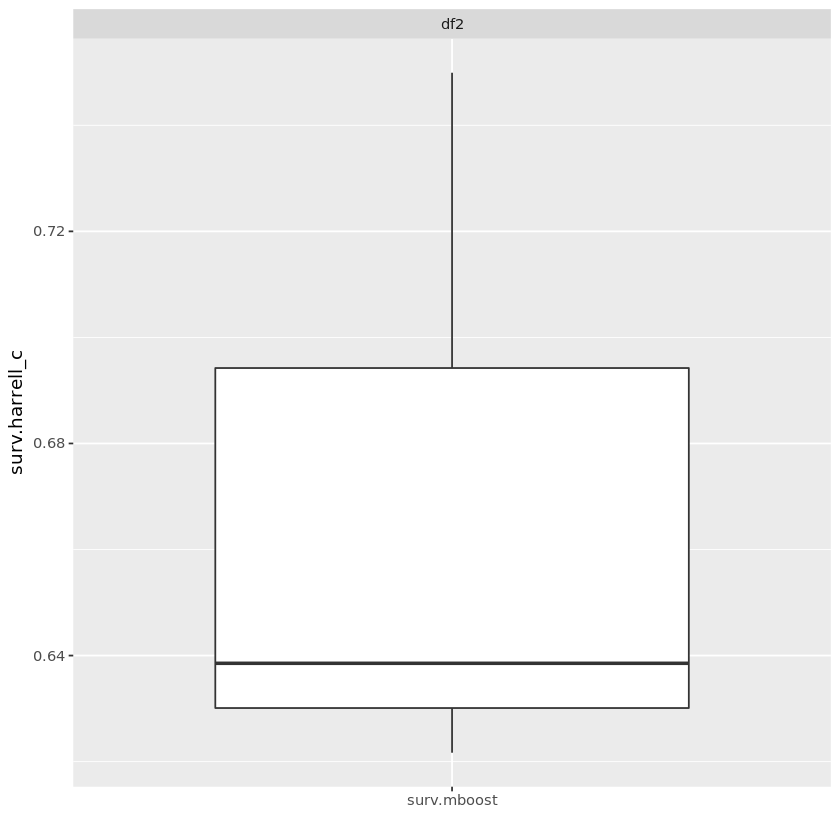

In [12]:
# plot the benchmark result with a default setting
autoplot(aft_bmr)

Step 1_2: Fine_tuning

In [13]:
# load the learner with aft
lrn_aft <- lrn("surv.mboost", baselearner = 'bols', family = "weibull")
# train with "baselearner"
base_learner_type <- c("bols", "btree")
family_type <- c("weibull", "loglog", "lognormal")

# set the search space
param_aft_bl <- ParamSet$new(params = list(
  ParamFct$new("baselearner", levels = base_learner_type),
  ParamFct$new("family", levels = family_type),
  ParamInt$new("mstop", lower = 50, upper = 300),
  ParamDbl$new("nu", lower = 0.05, upper = 0.5)
))

# inner resampling set
inner_rsmp <- rsmp("cv", folds = 3L)

# create the AutoTuner
grid_auto_aft <- AutoTuner$new(
  learner = lrn_aft, resampling = inner_rsmp,
  measure = msr("surv.cindex"), search_space = param_aft_bl,
  terminator = trm("evals", n_evals = 20), tuner = tnr("grid_search", resolution = 5)
)
# set the outer resampling
outer_rsmp <- rsmp("cv", folds = 3L)
# design the benchmark with bf
# design_aft_bl <- benchmark_grid(
#   tasks = tsks_train_d1,
#   learners = aft_bl,
#   resamplings = outer_rsmp
# )
aft_bmr_2 = resample(tsks_flt_d2, grid_auto_aft, outer_rsmp, store_models = TRUE)

INFO  [21:28:09.708] [mlr3]  Applying learner 'surv.mboost.tuned' on task 'df2' (iter 2/3) 
INFO  [21:28:09.753] [bbotk] Starting to optimize 4 parameter(s) with '<OptimizerGridSearch>' and '<TerminatorEvals> [n_evals=20]' 
INFO  [21:28:09.759] [bbotk] Evaluating 1 configuration(s) 
INFO  [21:28:09.788] [mlr3]  Benchmark with 3 resampling iterations 
INFO  [21:28:09.797] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 2/3) 
INFO  [21:28:11.533] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 3/3) 
INFO  [21:28:13.275] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 1/3) 
INFO  [21:28:15.093] [mlr3]  Finished benchmark 
INFO  [21:28:15.144] [bbotk] Result of batch 1: 
INFO  [21:28:15.148] [bbotk]  baselearner  family mstop   nu surv.harrell_c 
INFO  [21:28:15.148] [bbotk]        btree weibull    50 0.05      0.6578958 
INFO  [21:28:15.148] [bbotk]                                 uhash 
INFO  [21:28:15.148] [bbotk]  54007315-9fa2-4fcc-92f2-d56742d6dbe8 
I

Warning message in optimize(riskS, interval = nuirange, y = y, fit = f, w = w):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(riskS, interval = nuirange, y = y, fit = f, w = w):
“NA/Inf replaced by maximum positive value”
Warning message in optimize(riskS, interval = nuirange, y = y, fit = f, w = w):
“NA/Inf replaced by maximum positive value”


In [15]:
# evaluate the performance
aft_bmr_2$aggregate(measures = msr("surv.cindex")) # 0.6577

surv.harrell_c 
     0.6577103

In [16]:
## optimal hyperparameters found by grid search
aft_bmr_2$learners[[1]]$tuning_result$learner_param_vals

[[1]]
[[1]]$family
[1] "weibull"

[[1]]$baselearner
[1] "btree"

[[1]]$mstop
[1] 175

[[1]]$nu
[1] 0.05

Step_3_4: Autoplot the pre and tuned benchmark results

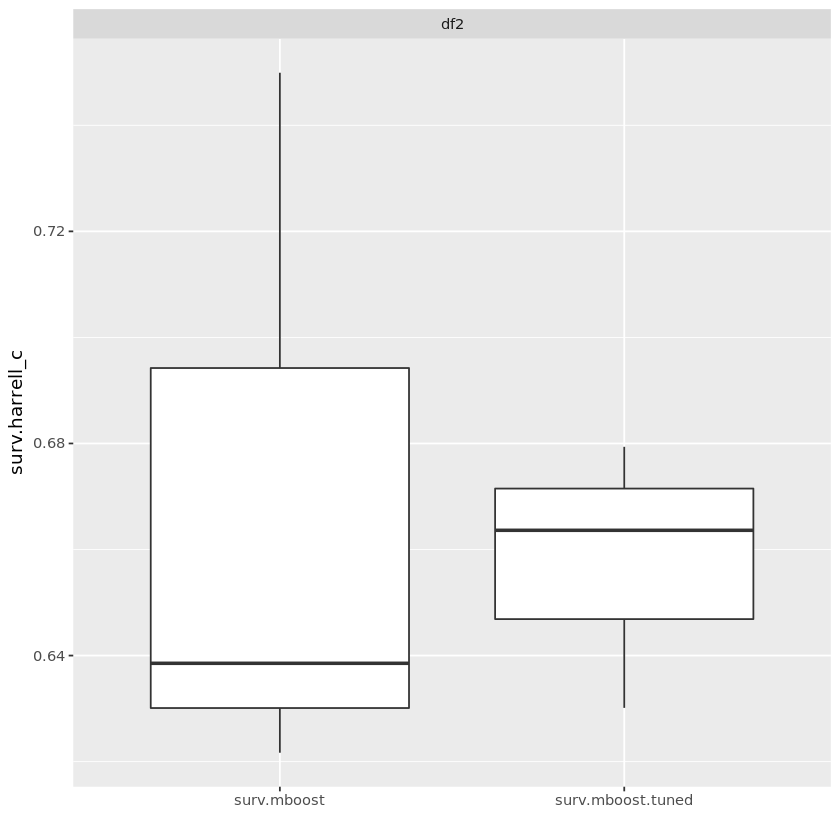

In [17]:
# autoplot the two boxplots
autoplot(c(aft_bmr,aft_bmr_2))

#### Step 2: mboost
Step 2_1: Try with a default setting

In [18]:
design <- benchmark_grid(
  tasks = tsks_flt_d2,
  learners = lrn("surv.mboost", baselearner = 'bols', family = "coxph"), # cannot compute ‘bbs’ for non-numeric variables; used ‘bols’ instead.
  resampling = rsmp("cv", folds = 3L)
)


# define function to start benchmark with fixed seed
run_benchmark <- function(design){
  set.seed(2021)
  bmr <- benchmark(design, store_models = TRUE)
  run_benchmark <- bmr
}

## run benchmark and save the results
mb_bmr <- run_benchmark(design)

INFO  [21:40:29.307] [mlr3]  Benchmark with 3 resampling iterations 
INFO  [21:40:29.317] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 2/3) 
INFO  [21:40:31.783] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 3/3) 
INFO  [21:40:34.420] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 1/3) 


Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”


INFO  [21:40:36.670] [mlr3]  Finished benchmark 


In [19]:
mb_bmr_results <- mb_bmr$aggregate(msr("surv.cindex"))
mb_bmr_results # 0.639

nr,resample_result,task_id,learner_id,resampling_id,iters,surv.harrell_c
<int>,<list>,<chr>,<chr>,<chr>,<int>,<dbl>
1,<environment: 0x55d947910e30>,df2,surv.mboost,cv,3,0.6386713


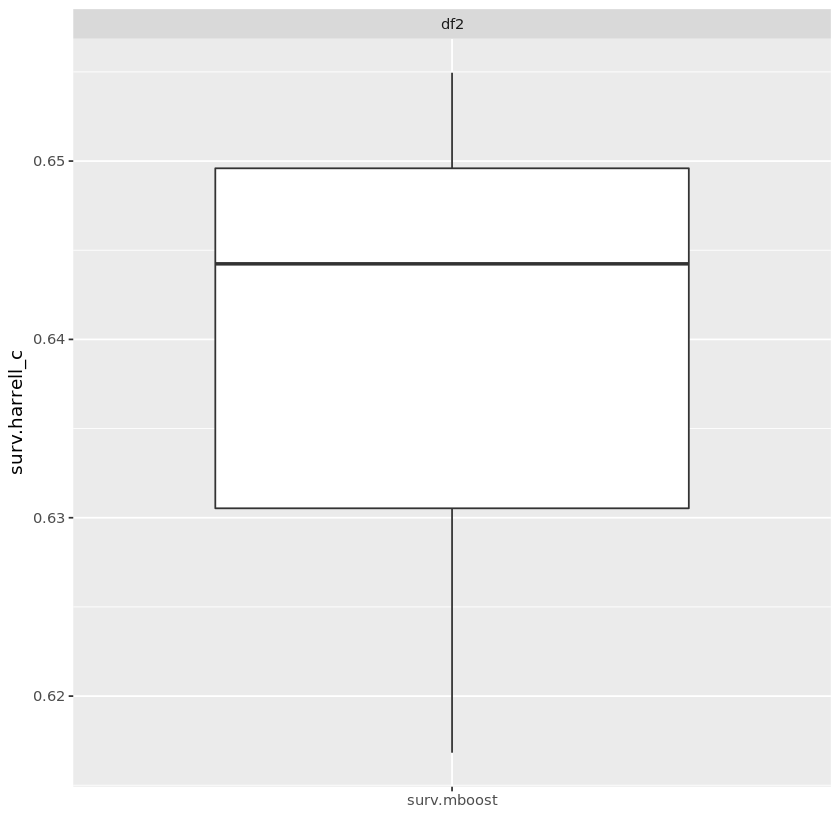

In [20]:
# plot the boxplots
autoplot(mb_bmr)

Step 2_2: Fine_tuning

In [21]:
# load the learner with mboost
lrn_mb <- lrn("surv.mboost", baselearner = 'bols', family = "coxph")
# train with "baselearner"
base_learner_type <- c("bols", "btree")
family_type <- c("cindex", "coxph")

# set the search space
param_mb <- ParamSet$new(params = list(
  ParamFct$new("baselearner", levels = base_learner_type),
  ParamFct$new("family", levels = family_type),
  ParamInt$new("mstop", lower = 50, upper = 300),
  ParamDbl$new("nu", lower = 0.05, upper = 0.5)
))

# inner resampling set
inner_rsmp <- rsmp("cv", folds = 3L)

# create the AutoTuner
grid_auto_mb <- AutoTuner$new(
  learner = lrn_mb, resampling = inner_rsmp,
  measure = msr("surv.cindex"), search_space = param_mb,
  terminator = trm("evals", n_evals = 20), tuner = tnr("grid_search", resolution = 5)
)
# set the outer resampling
outer_rsmp <- rsmp("cv", folds = 3L)
# design the benchmark with bf
# design_aft_bl <- benchmark_grid(
#   tasks = tsks_train_d1,
#   learners = aft_bl,
#   resamplings = outer_rsmp
# )
mb_bmr_2 = resample(tsks_flt_d2, grid_auto_mb, outer_rsmp, store_models = TRUE)


INFO  [21:41:00.120] [mlr3]  Applying learner 'surv.mboost.tuned' on task 'df2' (iter 2/3) 
INFO  [21:41:00.157] [bbotk] Starting to optimize 4 parameter(s) with '<OptimizerGridSearch>' and '<TerminatorEvals> [n_evals=20]' 
INFO  [21:41:00.162] [bbotk] Evaluating 1 configuration(s) 
INFO  [21:41:00.191] [mlr3]  Benchmark with 3 resampling iterations 
INFO  [21:41:00.200] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 1/3) 
INFO  [21:41:02.693] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 2/3) 
INFO  [21:41:05.190] [mlr3]  Applying learner 'surv.mboost' on task 'df2' (iter 3/3) 
INFO  [21:41:07.825] [mlr3]  Finished benchmark 
INFO  [21:41:07.872] [bbotk] Result of batch 1: 
INFO  [21:41:07.874] [bbotk]  baselearner family mstop  nu surv.harrell_c 
INFO  [21:41:07.874] [bbotk]        btree  coxph    50 0.5      0.6854131 
INFO  [21:41:07.874] [bbotk]                                 uhash 
INFO  [21:41:07.874] [bbotk]  2336afee-e956-4c19-a497-9b06ca92261d 
INFO 

Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”
Warning message in 1/R * n.event:
“longer object length is not a multiple of shorter object length”


In [22]:
# evaluate the performance
mb_bmr_2$aggregate() # 0.649

surv.harrell_c 
     0.6489586

In [23]:
## optimal hyperparameters found by grid search
mb_bmr_2$learners[[1]]$tuning_result$learner_param_vals

[[1]]
[[1]]$family
[1] "coxph"

[[1]]$baselearner
[1] "btree"

[[1]]$mstop
[1] 112

[[1]]$nu
[1] 0.05

Step_1_3: boxplot the pre and after

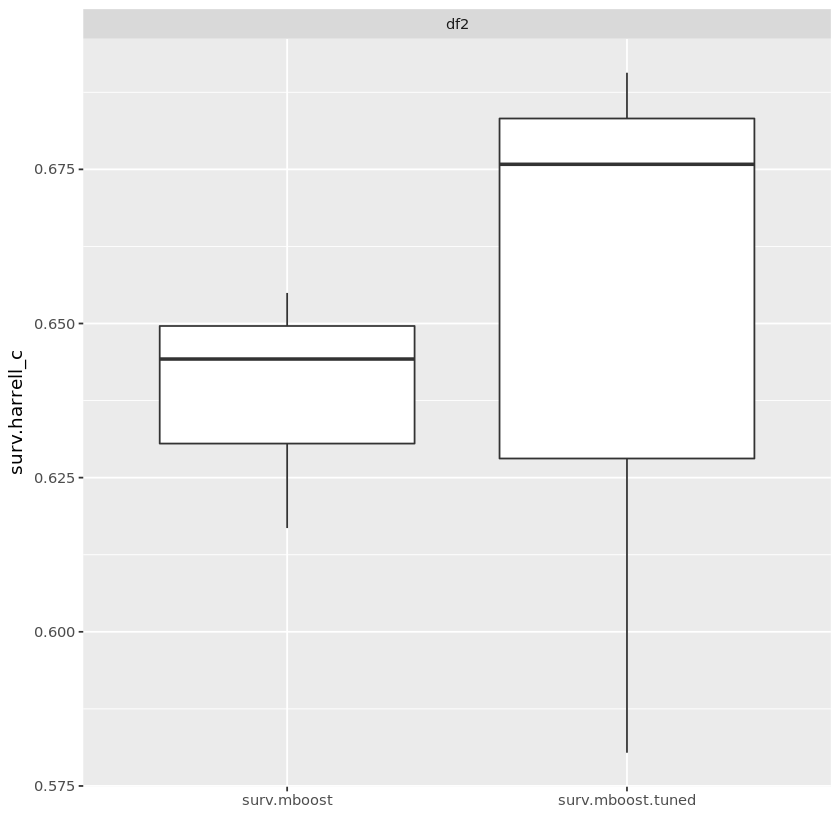

In [24]:
# autoplot the two boxplots
autoplot(c(mb_bmr, mb_bmr_2))

#### Step 3: CoxBoost
Step 3_1: check the task

In [7]:
# check the task
tsks_flt_d2

<TaskSurv:df2> (552 x 20)
* Target: time, status
* Properties: -
* Features (18):
  - dbl (18): V112, V113, V1284, V1396, V1448, V1461, V1559, V1583,
    V1609, V31, V37, V423, V578, V581, V648, V661, V736, V779

Step 3_2: Try with a default setting

In [8]:
library("pracma")


Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu


The following object is masked from ‘package:purrr’:

    cross




In [9]:
install_learners('surv.coxboost')

In [10]:
design <- benchmark_grid(
  tasks = tsks_flt_d2,
  learners = lrn("surv.coxboost", criterion="hpscore"),
  resampling = rsmp("cv", folds = 3L)
)

# lrn("surv.coxboost")$param_set

# define function to start benchmark with fixed seed
run_benchmark <- function(design){
  set.seed(2021)
  bmr <- benchmark(design, store_models = TRUE)
  run_benchmark <- bmr
}

## run benchmark and save the results
cb_bmr <- run_benchmark(design)


# set the global evaluation metric
all_measures <- msr("surv.cindex")

cb_results <- cb_bmr$aggregate(measures = all_measures)
cb_results # 0.686

INFO  [02:50:03.273] [mlr3]  Benchmark with 3 resampling iterations 
INFO  [02:50:03.423] [mlr3]  Applying learner 'surv.coxboost' on task 'df2' (iter 2/3) 
INFO  [02:50:09.193] [mlr3]  Applying learner 'surv.coxboost' on task 'df2' (iter 3/3) 
INFO  [02:50:14.298] [mlr3]  Applying learner 'surv.coxboost' on task 'df2' (iter 1/3) 
INFO  [02:50:19.512] [mlr3]  Finished benchmark 


nr,resample_result,task_id,learner_id,resampling_id,iters,surv.harrell_c
<int>,<list>,<chr>,<chr>,<chr>,<int>,<dbl>
1,<environment: 0x555b58a7d320>,df2,surv.coxboost,cv,3,0.685923


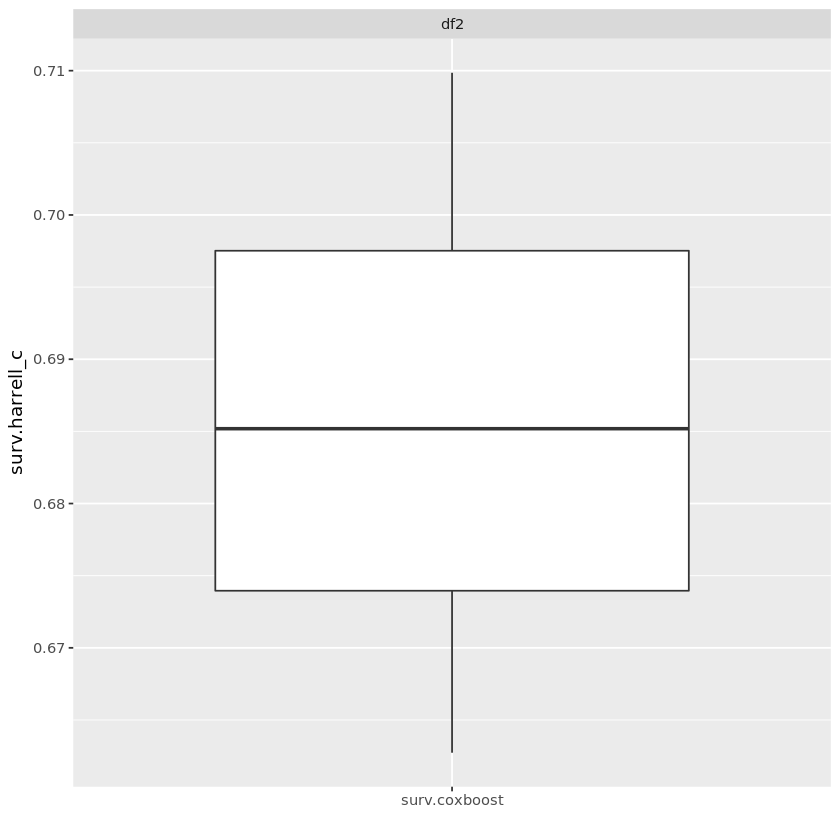

In [11]:
# plot the corresponding the performance
autoplot(cb_bmr)

Step_3_3: Fine-tuning with CoxBoost

In [12]:
# load the learner with CoxBoost
lrn_cb <- lrn("surv.coxboost", criterion="hpscore")
# from 50-250, 100-300, 150-250

# set the search space
param_cb <- ParamSet$new(params = list(
  ParamInt$new("stepno", lower = 100, upper = 300),
  ParamDbl$new("penalty", lower = 100, upper = 500),
  ParamDbl$new("stepsize.factor", lower = 0.1, upper = 10)
))

# inner resampling set
inner_rsmp <- rsmp("cv", folds = 2L)

# create the AutoTuner
grid_auto_cb <- AutoTuner$new(
  learner = lrn_cb, resampling =  inner_rsmp,
  measure = msr("surv.cindex"), search_space = param_cb,
  terminator = trm("evals", n_evals = 20), tuner = tnr("grid_search", resolution = 10)
)
# set the outer resampling
outer_rsmp <- rsmp("cv", folds = 2L)

cb_bmr_2 = resample(tsks_flt_d2, grid_auto_cb, outer_rsmp, store_models = TRUE)

INFO  [02:50:57.514] [mlr3]  Applying learner 'surv.coxboost.tuned' on task 'df2' (iter 2/2) 
INFO  [02:50:57.554] [bbotk] Starting to optimize 3 parameter(s) with '<OptimizerGridSearch>' and '<TerminatorEvals> [n_evals=20]' 
INFO  [02:50:57.561] [bbotk] Evaluating 1 configuration(s) 
INFO  [02:50:57.589] [mlr3]  Benchmark with 2 resampling iterations 
INFO  [02:50:57.598] [mlr3]  Applying learner 'surv.coxboost' on task 'df2' (iter 2/2) 
INFO  [02:50:59.394] [mlr3]  Applying learner 'surv.coxboost' on task 'df2' (iter 1/2) 
INFO  [02:51:01.103] [mlr3]  Finished benchmark 
INFO  [02:51:01.149] [bbotk] Result of batch 1: 
INFO  [02:51:01.153] [bbotk]  stepno  penalty stepsize.factor surv.harrell_c 
INFO  [02:51:01.153] [bbotk]     100 455.5556              10      0.6308657 
INFO  [02:51:01.153] [bbotk]                                 uhash 
INFO  [02:51:01.153] [bbotk]  8663d321-367e-4bf9-b22e-55de8880101e 
INFO  [02:51:01.155] [bbotk] Evaluating 1 configuration(s) 
INFO  [02:51:01.182

In [13]:
# evaluate the performance
cb_bmr_2$aggregate() # 0.6553

surv.harrell_c 
     0.6553455

In [14]:
## optimal hyperparameters found by grid search
cb_bmr_2$learners[[1]]$tuning_result$learner_param_vals	

[[1]]
[[1]]$criterion
[1] "hpscore"

[[1]]$stepno
[1] 100

[[1]]$penalty
[1] 500

[[1]]$stepsize.factor
[1] 3.4

Step_3_4: Autoplot the pre and after tuning boxplots

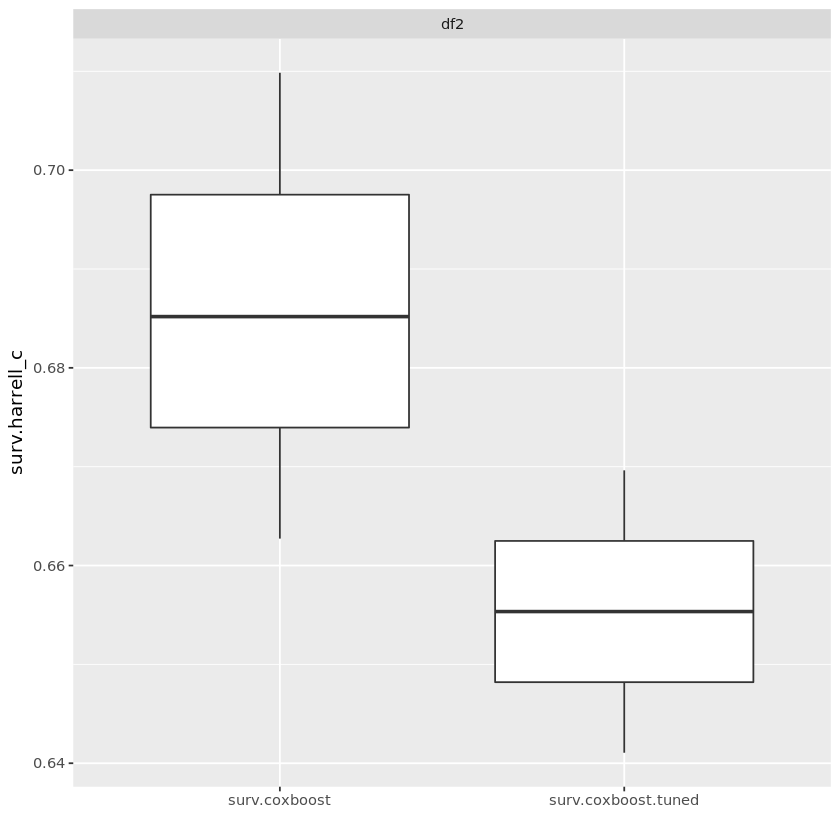

In [15]:
# autoplot the two boxplots
autoplot(c(cb_bmr, cb_bmr_2))